In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [21]:

# For matrix computation# For m 
import numpy as np
# For data manipulation 
import pandas as pd
# For 2D plotting 
from matplotlib import pyplot as plt
# For 3D plotting 
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LogisticRegression

In [22]:
# Load data set and display first few observations
dataset = pd.read_csv("Desktop/YLP/mydata/pima-indians-diabetes.csv")


In [23]:
dataset.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [24]:
dataset.describe()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,33.240885,0.348958
std,3.369578,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,24.000000,0.000000
50%,3.000000,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,29.000000,0.000000
75%,6.000000,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,41.000000,1.000000
max,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.000000,1.000000


In [25]:
# Define features
X = dataset.iloc[:,0:8]

# Define categorical outcome 
y = dataset.iloc[:,8]

In [26]:
# Standardize feature space to have mean 0 and variance 1
X_std = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)

In [27]:
X_std.shape

(768, 8)

In [28]:
# Step 1: Find covariance matrix of X

# Obtain covariance matrix for X (note columns are the features)
cov_matrix = np.cov(X_std, rowvar=False)
# Note that covariance matrix is 8x8 since their are 8 features
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 1.00130378  0.12962746  0.14146618 -0.08177826 -0.07363049  0.01770615
  -0.03356638  0.54505093]
 [ 0.12962746  1.00130378  0.15278853  0.05740263  0.33178913  0.2213593
   0.13751636  0.26385788]
 [ 0.14146618  0.15278853  1.00130378  0.2076409   0.08904933  0.2821727
   0.04131875  0.23984024]
 [-0.08177826  0.05740263  0.2076409   1.00130378  0.43735204  0.39308503
   0.18416737 -0.11411885]
 [-0.07363049  0.33178913  0.08904933  0.43735204  1.00130378  0.19811702
   0.18531222 -0.04221793]
 [ 0.01770615  0.2213593   0.2821727   0.39308503  0.19811702  1.00130378
   0.14083033  0.03628912]
 [-0.03356638  0.13751636  0.04131875  0.18416737  0.18531222  0.14083033
   1.00130378  0.03360507]
 [ 0.54505093  0.26385788  0.23984024 -0.11411885 -0.04221793  0.03628912
   0.03360507  1.00130378]]


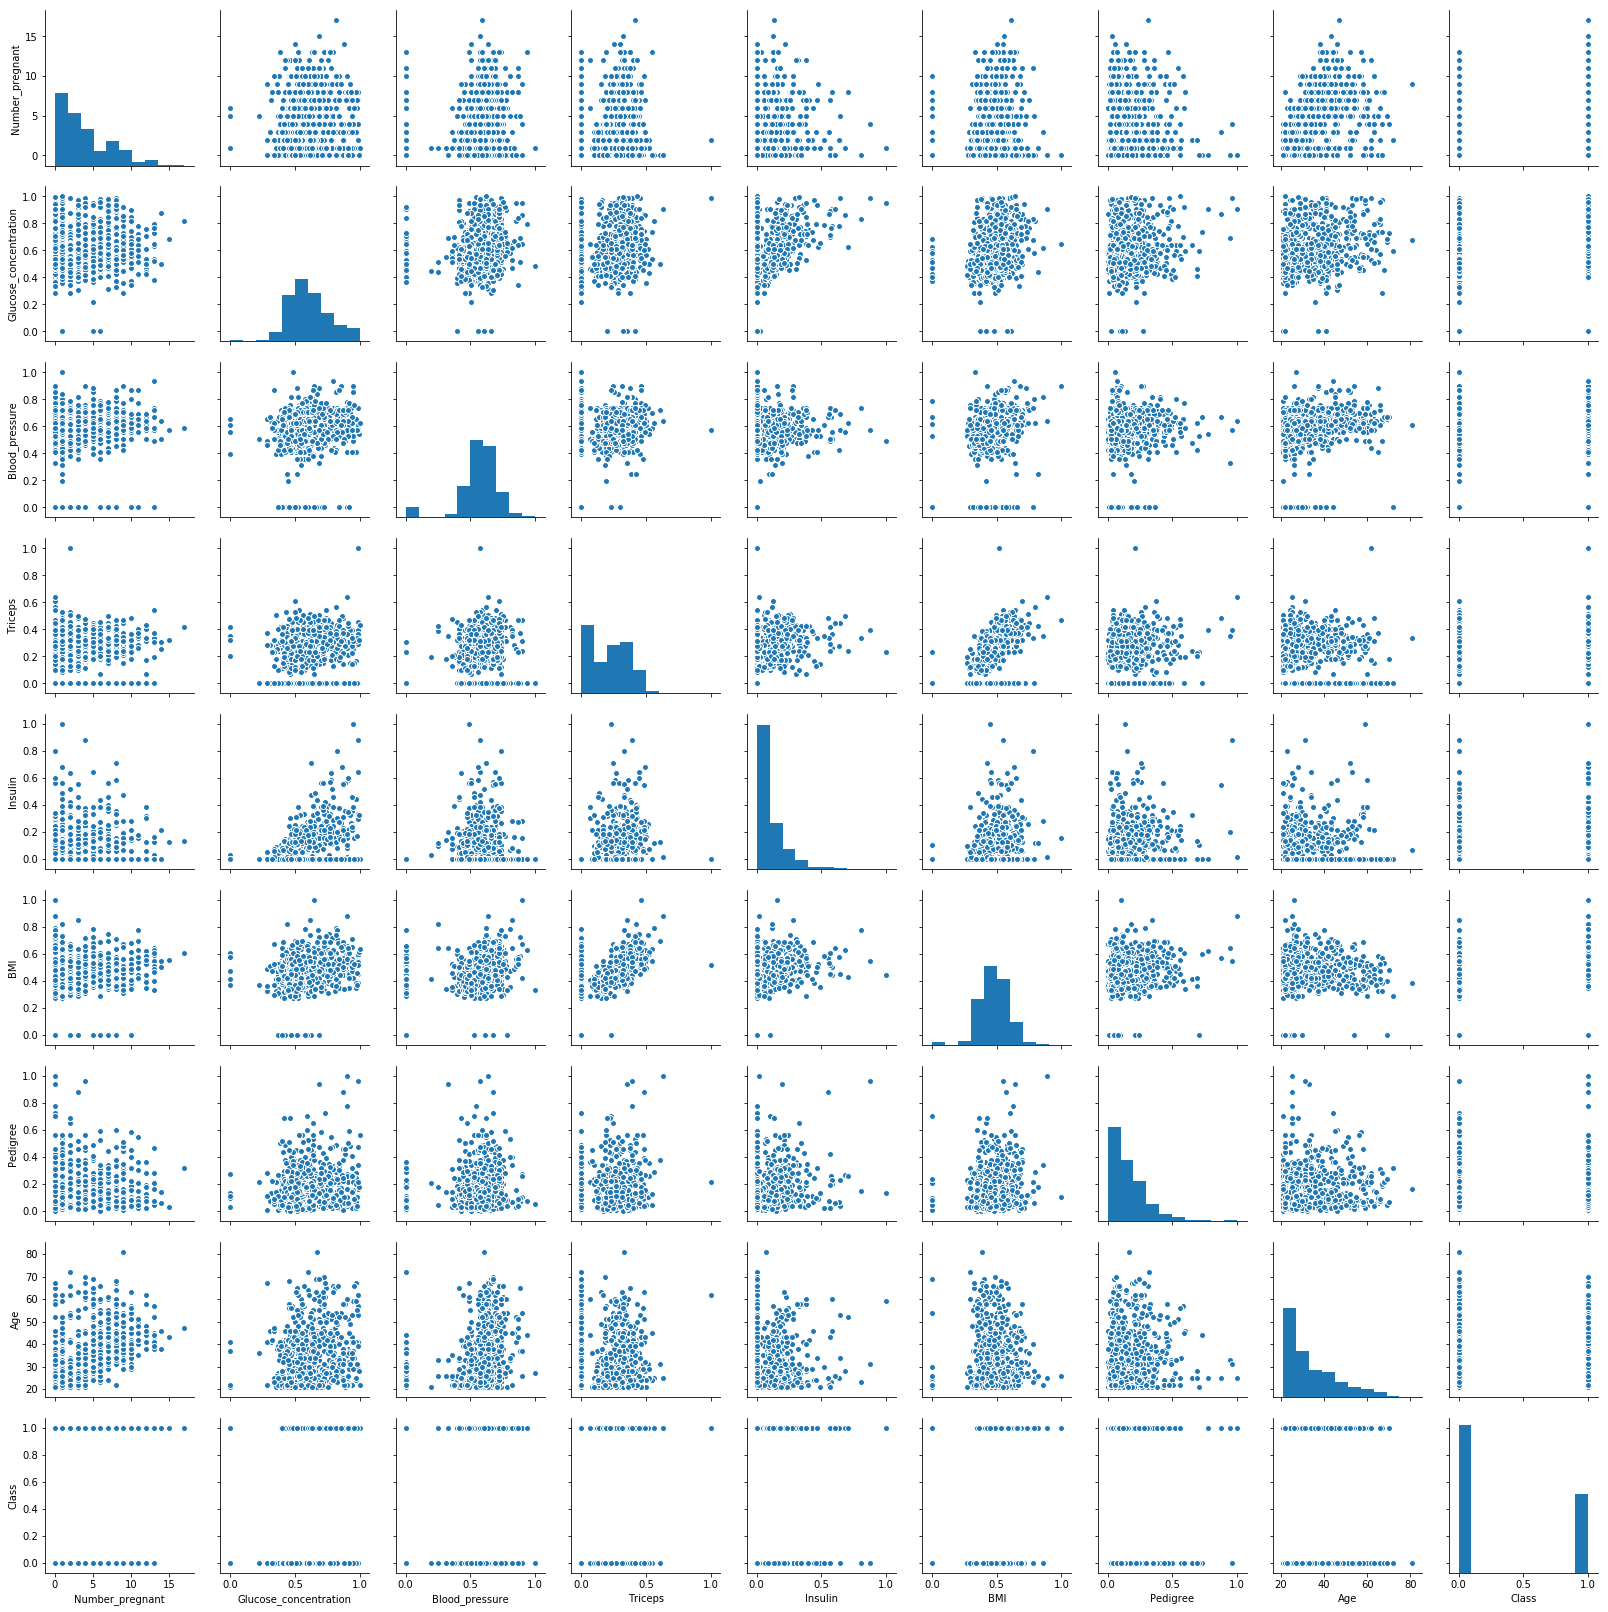

In [29]:
import seaborn as sns
sns.pairplot(dataset)

In [30]:
# Step 2: Obtain eigenvectors and eigenvalues
# Obtain eigenvalues and eigenvectors 
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

In [31]:
# eigenvalues is a 8x1 vector
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)


Eigenvalues of Cov(X): 
[2.09711056 1.73346726 0.42036353 0.40498938 0.68351839 0.76333832
 0.87667054 1.03097228]


In [32]:
# eigenvectors is a 8x8 matrix
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)

Eigenvectors of Cov(X): 
[[-0.1284321  -0.59378583 -0.58879003  0.11784098 -0.19359817  0.47560573
  -0.08069115  0.01308692]
 [-0.39308257 -0.17402908 -0.06015291  0.45035526 -0.09416176 -0.46632804
   0.40432871 -0.46792282]
 [-0.36000261 -0.18389207 -0.19211793 -0.01129554  0.6341159  -0.32795306
  -0.05598649  0.53549442]
 [-0.43982428  0.33196534  0.28221253  0.5662838  -0.00958944  0.48786206
  -0.03797608  0.2376738 ]
 [-0.43502617  0.25078106 -0.13200992 -0.54862138  0.27065061  0.34693481
   0.34994376 -0.33670893]
 [-0.45194134  0.1009598  -0.03536644 -0.34151764 -0.68537218 -0.25320376
  -0.05364595  0.36186463]
 [-0.27061144  0.122069   -0.08609107 -0.00825873  0.08578409 -0.11981049
  -0.8336801  -0.43318905]
 [-0.19802707 -0.62058853  0.71208542 -0.21166198  0.03335717  0.10928996
  -0.0712006  -0.07524755]]


In [33]:
# Step 3: Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[2.0971105579945277, 1.7334672594471296, 1.0309722810083823, 0.8766705419094799, 0.7633383156496742, 0.6835183858447278, 0.4203635280495677, 0.4049893778148993]


In [36]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  
# an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors) 

In [38]:
print(var_explained)

[0.2617974931611005, 0.21640126757746542, 0.128703733648019, 0.10944113047600433, 0.09529304819389643, 0.08532854849331149, 0.05247702246321911, 0.05055775598698365]


In [39]:
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

In [40]:
print(cum_var_exp)

[0.26179749 0.47819876 0.60690249 0.71634362 0.81163667 0.89696522
 0.94944224 1.        ]


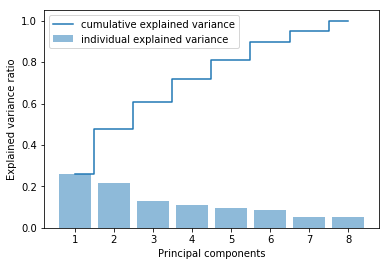

In [41]:
plt.bar(range(1,9), var_explained, alpha=0.5, align='center', 
        label='individual explained variance')

plt.step(range(1,9),cum_var_exp, where= 'mid', 
         label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.legend(loc = 'best')
plt.show()

# The plot shows that the first principal component alone accounts for 40 percent of the variance. 
# Also, we can see that the first two principal components combined explain almost 60 percent of the variance 
# in the data.

In [42]:
# Step 4: Project data onto 2d 

# Keep the first two principal components 
# P_reduce is 8 x 2 matrix
P_reduce = np.array(eigvectors_sort[0:8]).transpose()

# Let's project data onto 2D space
# The projected data in 2D will be n x 2 matrix
Proj_data_2D = np.dot(X_std,P_reduce)

In [43]:
X_std.shape, P_reduce.shape, Proj_data_2D.shape

((768, 8), (8, 8), (768, 8))

In [44]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_2D, y, test_size=test_size, random_state=seed)

In [45]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(result)

0.7792207792207793
